# Image Effect - Strings
---
- Author: Diego Inácio
- GitHub: [github.com/diegoinacio](https://github.com/diegoinacio)
- Notebook: [imgFX_strings.ipynb](https://github.com/diegoinacio/creative-coding-notebooks/blob/master/Generative/imgFX_strings.ipynb)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random, math, time
from PIL import Image as image

from _utils import *

In [2]:
def averColor(color):
    '''
    Returns the mean value between channels
    '''
    cr = float(color[0])
    cg = float(color[1])
    cb = float(color[2])
    cd = (cr + cg + cb)/3
    return cd

def setRange(value, smin, smax, dmin, dmax):
    '''
    Linear interpolation
    '''
    value = float(value)
    smin, smax = float(smin), float(smax)
    dmin, dmax = float(dmin), float(dmax)
    out = dmin + ((value - smin)/(smax - smin))*(dmax - dmin)
    return int(out)

class Point:
    def __init__(self, tx, ty):
        self.tx = tx
        self.ty = ty
    
    def setColor(self):
        '''
        Color defining
        '''
        self.cd = imgIn.getpixel((self.tx, self.ty))
    
    def setRad(self):
        '''
        Radius defining
        '''
        try:
            apix = averColor(self.cd)
            self.rad = setRange(apix, 0, 255, minSize, maxSize)
        except:
            self.rad = minSize
    
    def circle(self):
        '''
        Draw circle
        '''
        r1 = self.rad
        r2 = self.rad + antAlsg
        for y in range(self.ty - r2, self.ty + r2):
            for x in range(self.tx - r2, self.tx + r2):
                try:
                    dx = math.pow(self.tx - x, 2.0)
                    dy = math.pow(self.ty - y, 2.0)
                    r = math.sqrt(dx + dy)
                    if r <= r1:
                        imgOut.putpixel((x, y), self.cd)
                    elif r > r2:
                        cdt = imgOut.getpixel((x, y))
                        imgOut.putpixel((x, y), cdt)
                    else:
                        cdt = imgOut.getpixel((x, y))
                        ca = (r2 - r)/(r2 - r1)
                        cr = int(self.cd[0]*ca + cdt[0]*(1 - ca))
                        cg = int(self.cd[1]*ca + cdt[1]*(1 - ca))
                        cb = int(self.cd[2]*ca + cdt[2]*(1 - ca))
                        imgOut.putpixel((x, y), (cr, cg, cb))
                except:
                    continue

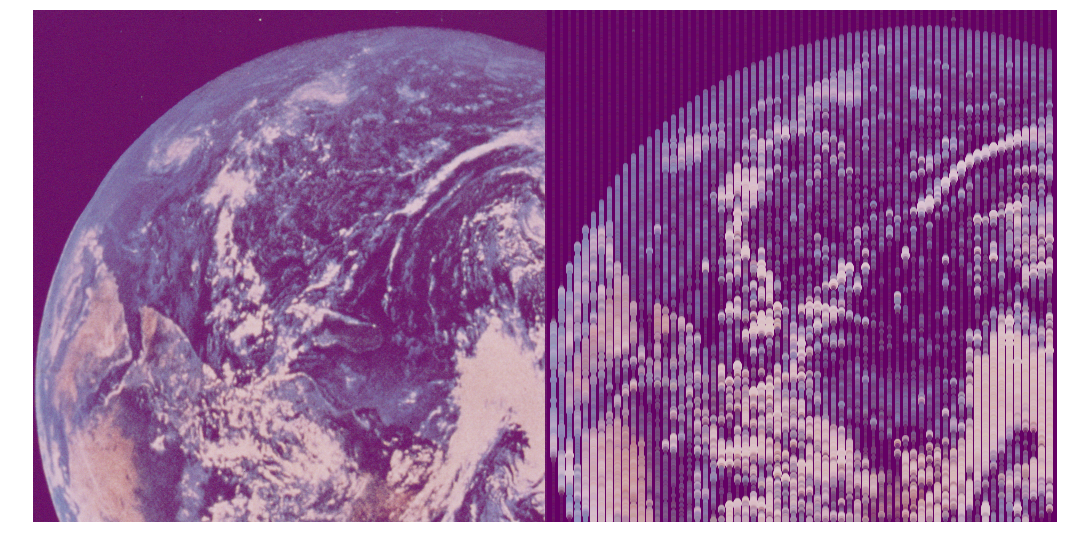

Wall time: 5.65 s


In [3]:
%%time
# parameters
sb = 8             # space between strings
minSize = 0        # minimum size
maxSize = 5        # maximum size
antAlsg = 1        # circle antialising level
BG = (100, 0, 100) # background color

# init
img = image.open('../_data/earth.png')
imx = img.size[0]
imy = img.size[1]
imgIn = image.new('RGB', img.size)
imgIn.paste(img)
imgOut = image.new('RGB', img.size, BG)

# ececution
lpt = []
for x in range(0, imx - 1, sb):
    for y in range(imy - 1):
        p = Point(x, y)
        lpt.append(p)

for point in lpt:
    point.setColor()
    point.setRad()
    point.circle()

output = np.array([np.asarray(imgIn),
                   np.asarray(imgOut)])
panel(output, (2, 1))